# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  

Dataset yang digunakan dalam proyek ini adalah **IBM HR Analytics Employee Attrition & Performance**.
Dataset ini berisi informasi terkait karyawan di sebuah perusahaan, termasuk data demografis, pekerjaan, dan apakah mereka melakukan resign (attrition) atau tidak.

Tujuan dari analisis ini adalah untuk memprediksi kemungkinan seorang karyawan akan mengundurkan diri berdasarkan karakteristik mereka.


# **2. Import Library**


Tahapan ini memuat pustaka-pustaka (library) yang dibutuhkan dalam proses eksperimen machine learning.

Beberapa library digunakan untuk:
- Manipulasi data: `pandas`, `numpy`
- Visualisasi: `matplotlib`, `seaborn`
- Pra-pemrosesan: `LabelEncoder`, `StandardScaler`
- Pembagian data: `train_test_split`
- Penanganan warning: agar tampilan tetap bersih dan fokus

Mengimpor library ini penting sebagai fondasi teknis sebelum melanjutkan ke analisis data.


In [1]:
# Library utama untuk manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Untuk memfilter warning yang tidak penting
import warnings
warnings.filterwarnings('ignore')

# Untuk menampilkan seluruh kolom
pd.set_option('display.max_columns', None)


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan


Pada tahap ini, dataset dibaca menggunakan fungsi `read_csv()` dari pustaka `pandas`.

Langkah awal eksplorasi dilakukan dengan:
- Melihat 5 baris pertama untuk memahami struktur data
- Melihat info tipe data dan jumlah non-null tiap kolom
- Melihat statistik ringkasan untuk fitur numerik
- Menampilkan jumlah baris dan kolom untuk mengetahui skala data

Langkah ini sangat penting untuk memastikan bahwa data telah dimuat dengan benar dan siap untuk dianalisis lebih lanjut.


In [5]:
# Memuat dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Menampilkan 5 baris pertama
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Menampilkan informasi umum dari dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Menampilkan statistik deskriptif
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


Jumlah baris: 1470
Jumlah kolom: 35



Pada tahap ini, dataset dibaca menggunakan fungsi `read_csv()` dari pustaka `pandas`.

Langkah awal eksplorasi dilakukan dengan:
- Melihat 5 baris pertama untuk memahami struktur data
- Melihat info tipe data dan jumlah non-null tiap kolom
- Melihat statistik ringkasan untuk fitur numerik
- Menampilkan jumlah baris dan kolom untuk mengetahui skala data

Langkah ini sangat penting untuk memastikan bahwa data telah dimuat dengan benar dan siap untuk dianalisis lebih lanjut.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


EDA adalah proses eksplorasi untuk memahami pola, hubungan antar fitur, distribusi nilai, dan struktur umum data.

Beberapa analisis yang dilakukan di tahap ini antara lain:
- Distribusi target "Attrition": untuk mengetahui proporsi karyawan resign dan tidak
- Heatmap korelasi: melihat hubungan antara fitur numerik, apakah saling berkorelasi atau tidak
- Visualisasi berdasarkan job role, status pernikahan, dan lembur: untuk mengevaluasi faktor-faktor yang mungkin berpengaruh terhadap keputusan resign
- Distribusi usia dan pendapatan: untuk memahami bagaimana faktor usia atau income berkaitan dengan attrition

Hasil EDA menjadi bekal untuk menentukan fitur penting dan strategi preprocessing serta modeling ke depannya.


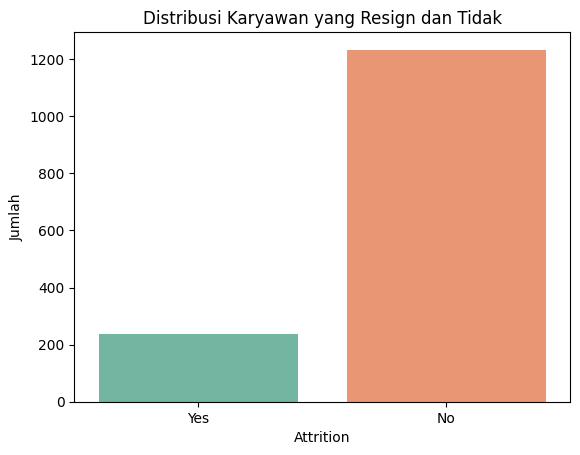

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [9]:
# Distribusi kelas target
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Distribusi Karyawan yang Resign dan Tidak')
plt.xlabel('Attrition')
plt.ylabel('Jumlah')
plt.show()

# Proporsi persen
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)


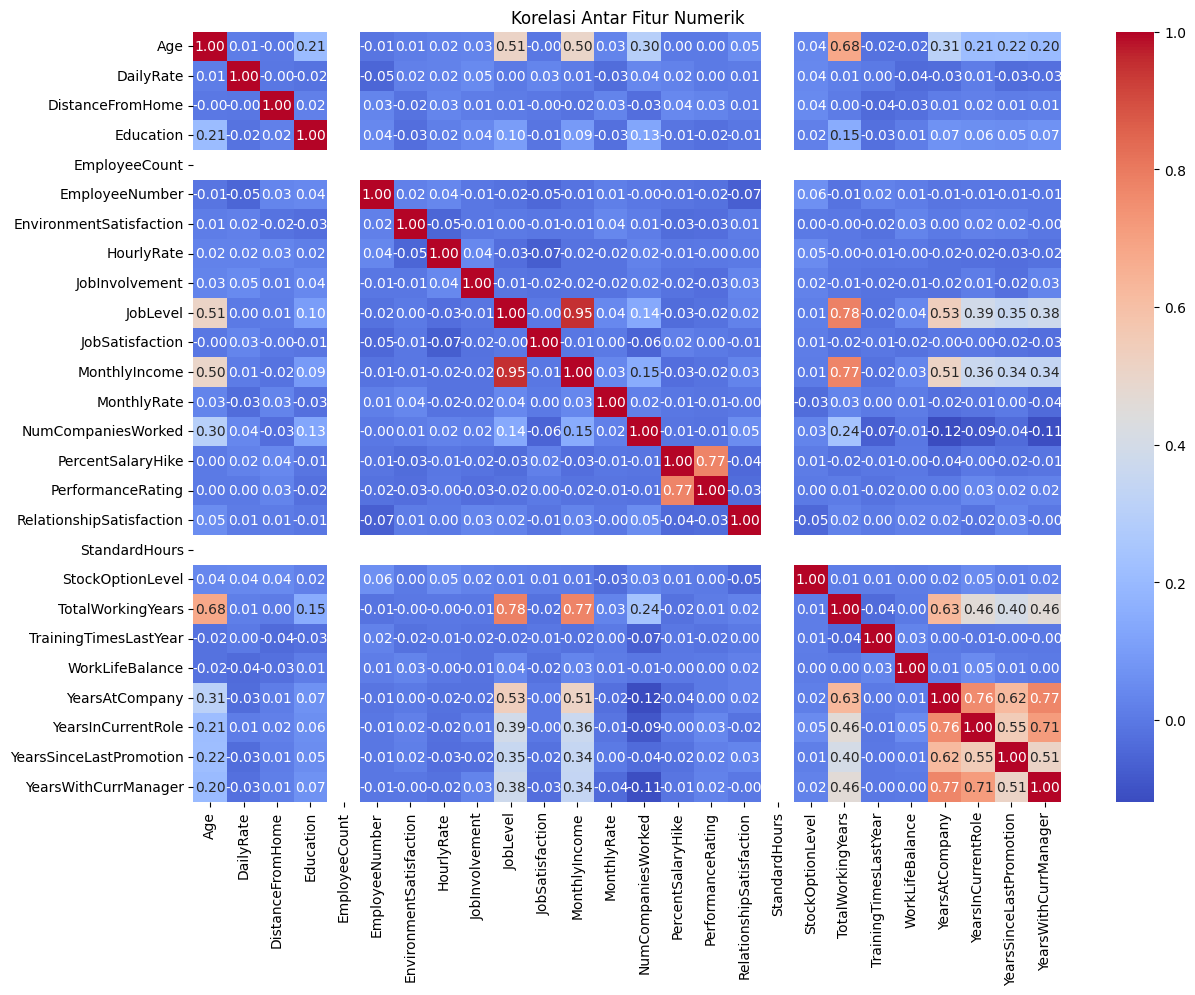

In [10]:
# Korelasi antar fitur numerik
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


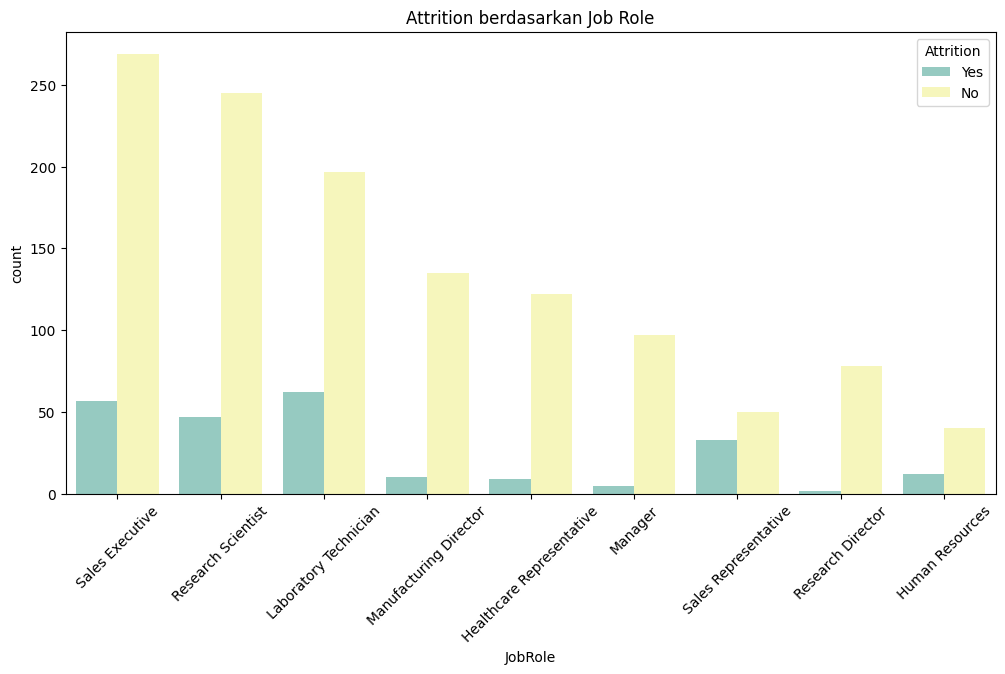

In [12]:
# Attrition berdasarkan Job Role
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Set3')
plt.title('Attrition berdasarkan Job Role')
plt.xticks(rotation=45)
plt.show()


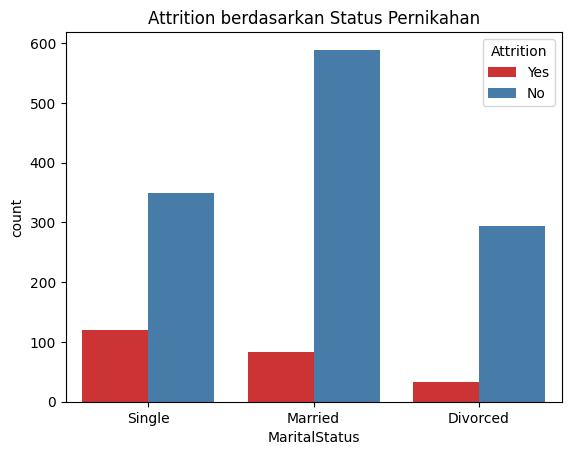

In [13]:
# Attrition berdasarkan Status Pernikahan
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set1')
plt.title('Attrition berdasarkan Status Pernikahan')
plt.show()


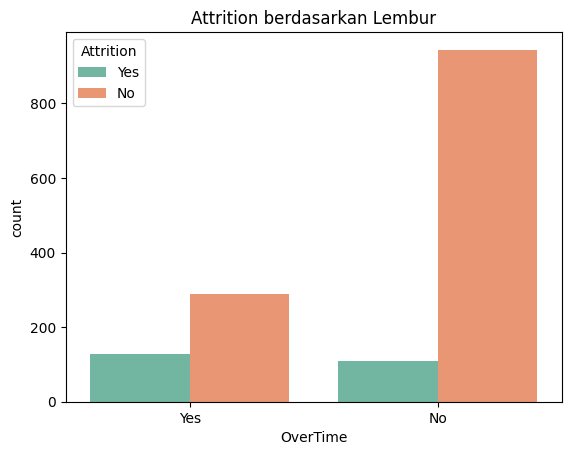

In [14]:
# Attrition berdasarkan OverTime
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Attrition berdasarkan Lembur')
plt.show()


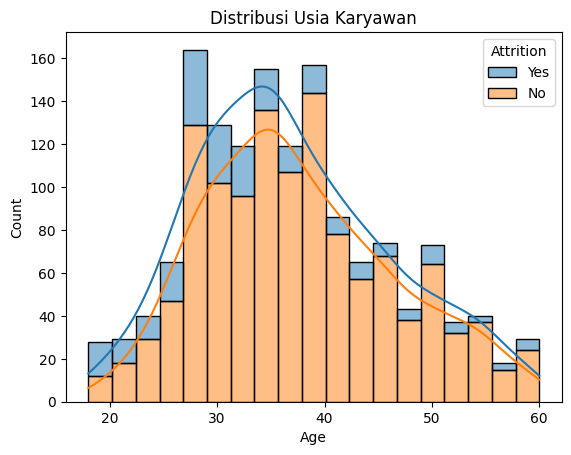

In [15]:
# Distribusi usia karyawan
sns.histplot(data=df, x='Age', kde=True, hue='Attrition', multiple='stack')
plt.title('Distribusi Usia Karyawan')
plt.show()


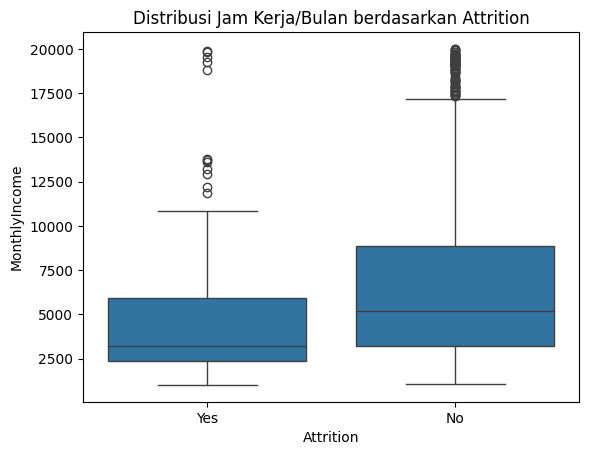

In [16]:
# Jam kerja per minggu vs attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyHoursWorked' if 'MonthlyHoursWorked' in df.columns else 'MonthlyIncome')
plt.title('Distribusi Jam Kerja/Bulan berdasarkan Attrition')
plt.show()



EDA adalah proses eksplorasi untuk memahami pola, hubungan antar fitur, distribusi nilai, dan struktur umum data.

Beberapa analisis yang dilakukan di tahap ini antara lain:
- Distribusi target "Attrition": untuk mengetahui proporsi karyawan resign dan tidak
- Heatmap korelasi: melihat hubungan antara fitur numerik, apakah saling berkorelasi atau tidak
- Visualisasi berdasarkan job role, status pernikahan, dan lembur: untuk mengevaluasi faktor-faktor yang mungkin berpengaruh terhadap keputusan resign
- Distribusi usia dan pendapatan: untuk memahami bagaimana faktor usia atau income berkaitan dengan attrition

Hasil EDA menjadi bekal untuk menentukan fitur penting dan strategi preprocessing serta modeling ke depannya.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
# Cek missing values
missing = df.isnull().sum()
print("Jumlah missing values per kolom:\n", missing[missing > 0])


Jumlah missing values per kolom:
 Series([], dtype: int64)


In [18]:
# Jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")

# Hapus duplikat jika ada
df = df.drop_duplicates()


Jumlah duplikasi: 0


In [19]:
# Ubah kolom 'Attrition' menjadi numerik: Yes = 1, No = 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [20]:
# Pisahkan fitur numerik dan kategorikal
categorical_cols = df.select_dtypes(include='object').columns
print("Fitur kategorikal:\n", categorical_cols)

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Fitur kategorikal:
 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [21]:
# Contoh menggunakan Z-score
from scipy.stats import zscore
z_scores = zscore(df_encoded.select_dtypes(include='number'))

# Identifikasi data dengan z-score > 3 (indikasi outlier)
outliers = (np.abs(z_scores) > 3).sum(axis=1)
print("Jumlah data dengan outlier ekstrem (z > 3):", (outliers > 0).sum())


Jumlah data dengan outlier ekstrem (z > 3): 83


In [22]:
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi ke DataFrame kembali (opsional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [23]:
# Simpan X_scaled_df dan y sebagai dataset akhir
X_final = X_scaled_df
y_final = y


In [24]:
# Simpan hasil preprocessing ke CSV
X_final.to_csv("X_final.csv", index=False)
y_final.to_csv("y_final.csv", index=False)



Tahapan ini bertujuan untuk mempersiapkan data sebelum digunakan dalam model machine learning. Data yang kotor atau tidak seragam dapat menyebabkan performa model menjadi buruk.

Langkah-langkah preprocessing yang dilakukan meliputi:

1. **Cek dan tangani missing value**  
   Dataset dicek apakah memiliki data kosong yang perlu diisi atau dihapus.

2. **Menghapus duplikat**  
   Duplikasi baris dapat mengganggu analisis, maka dihapus jika ada.

3. **Encoding target**  
   Kolom 'Attrition' diubah dari teks menjadi angka: 'Yes' = 1, 'No' = 0, agar bisa digunakan dalam model ML.

4. **One-Hot Encoding fitur kategorikal**  
   Fitur bertipe string dikonversi menjadi bentuk numerik menggunakan teknik One-Hot Encoding.

5. **Deteksi outlier**  
   Menggunakan Z-score untuk mendeteksi nilai-nilai yang menyimpang ekstrem. Ini bisa membantu kita memutuskan apakah akan menghapus atau menangani nilai-nilai ekstrem ini.

6. **Standardisasi fitur numerik**  
   Dilakukan agar semua fitur memiliki skala yang sama (rata-rata 0, standar deviasi 1), yang penting untuk algoritma seperti KNN, SVM, Logistic Regression, dll.

7. **Pisahkan fitur dan target**  
   Dataset akhir disiapkan dalam bentuk `X_final` (fitur) dan `y_final` (target), yang akan digunakan pada tahap pembuatan model.

Preprocessing adalah pondasi penting yang menentukan keberhasilan model yang akan dibangun.
